<a href="https://colab.research.google.com/github/samehra/interview-prep/blob/main/GeeksForGeeks_Implementing_an_Autoencoder_in_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

tensor_transform = transforms.ToTensor()
dataset = datasets.MNIST(root="./data", train=True, download=True, transform=tensor_transform)
loader = torch.utils.data.DataLoader(dataset=dataset, batch_size=32, shuffle=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 481kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.48MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.84MB/s]


In [ ]:
class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 36),
            nn.ReLU(),
            nn.Linear(36, 18),
            nn.ReLU(),
            nn.Linear(18, 9)
        )
        self.decoder = nn.Sequential(
            nn.Linear(9, 18),
            nn.ReLU(),
            nn.Linear(18, 36),
            nn.ReLU(),
            nn.Linear(36, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [ ]:
model = AE()
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-8)

Epoch 1/20, Loss: 0.038763
Epoch 2/20, Loss: 0.032907
Epoch 3/20, Loss: 0.033870
Epoch 4/20, Loss: 0.028562
Epoch 5/20, Loss: 0.024904
Epoch 6/20, Loss: 0.024376
Epoch 7/20, Loss: 0.021879
Epoch 8/20, Loss: 0.020452
Epoch 9/20, Loss: 0.024417
Epoch 10/20, Loss: 0.023557
Epoch 11/20, Loss: 0.023532
Epoch 12/20, Loss: 0.022097
Epoch 13/20, Loss: 0.017887
Epoch 14/20, Loss: 0.019853
Epoch 15/20, Loss: 0.018735
Epoch 16/20, Loss: 0.021074
Epoch 17/20, Loss: 0.020866
Epoch 18/20, Loss: 0.023651
Epoch 19/20, Loss: 0.020996
Epoch 20/20, Loss: 0.019283


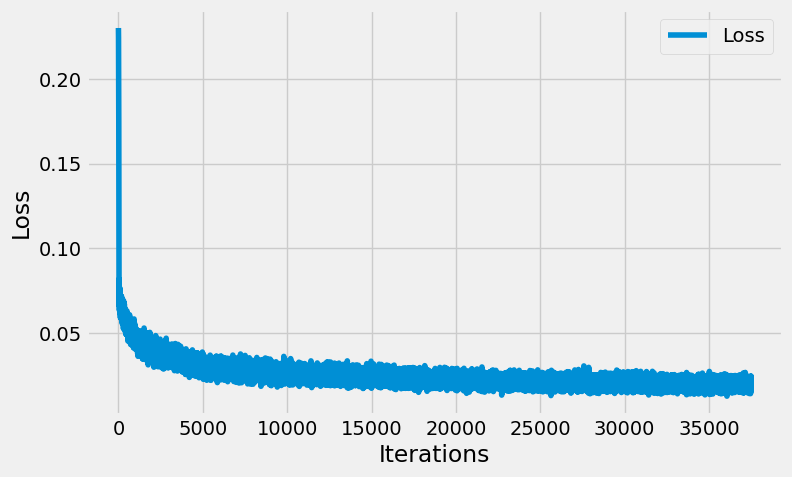

In [ ]:
epochs = 20
outputs = []
losses = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(epochs):
    for images, _ in loader:
        images = images.view(-1, 28 * 28).to(device)

        reconstructed = model(images)
        loss = loss_function(reconstructed, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

    outputs.append((epoch, images, reconstructed))
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.6f}")

plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 5))
plt.plot(losses, label='Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

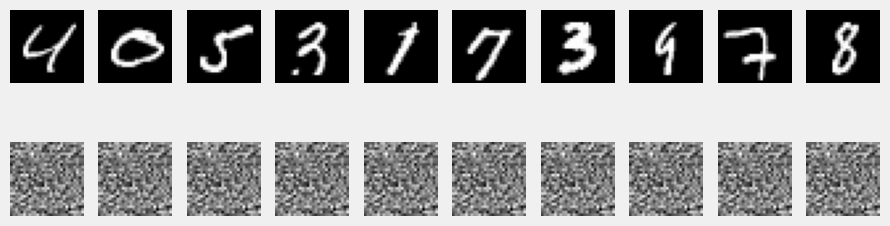

In [ ]:
model.eval()
dataiter = iter(loader)
images, _ = next(dataiter)

images = images.view(-1, 28 * 28).to(device)
model.to(device)
reconstructed = model(images)

fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(10, 3))
for i in range(10):
    axes[0, i].imshow(images[i].cpu().detach().numpy().reshape(28, 28), cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].imshow(reconstructed[i].cpu().detach().numpy().reshape(28, 28), cmap='gray')
    axes[1, i].axis('off')
plt.show()

## Practice Code

In [1]:
import torch
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
from torchvision import datasets, transforms

tensor_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(0,1)])
train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=tensor_transform)
test_dataset = datasets.MNIST(root="./data", train=False, download=True, transform=tensor_transform)

batch_size = 128
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset = test_dataset, batch_size=5, shuffle=False)

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.00MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 58.1kB/s]
100%|██████████| 1.65M/1.65M [00:06<00:00, 241kB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.57MB/s]


In [3]:
class Encoder(nn.Module):

  def __init__(self):
    super().__init__()
    self.encoder = nn.Sequential(
        nn.Linear(28*28, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 32),
        nn.ReLU()
    )

  def forward(self, x):
    return self.encoder(x)

In [4]:
class Decoder(nn.Module):

  def __init__(self):
    super().__init__()
    self.decoder = nn.Sequential(
        nn.Linear(32, 64),
        nn.ReLU(),
        nn.Linear(64, 128),
        nn.ReLU(),
        nn.Linear(128, 28*28),
        nn.Sigmoid()
    )

  def forward(self, x):
    return self.decoder(x)

In [5]:
class AE(nn.Module):

  def __init__(self):
    super().__init__()

    self.enc = Encoder()
    self.dec = Decoder()

  def forward(self, x):
    encoded = self.enc(x)
    decoded = self.dec(encoded)

    return decoded

In [6]:
model = AE()
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-8)

epoch:1/10, Loss:1.0251221656799316
epoch:2/10, Loss:1.023292899131775
epoch:3/10, Loss:1.0204166173934937
epoch:4/10, Loss:1.014078140258789
epoch:5/10, Loss:1.0130912065505981
epoch:6/10, Loss:1.0042295455932617
epoch:7/10, Loss:1.015222430229187
epoch:8/10, Loss:0.9963474273681641
epoch:9/10, Loss:0.9989247918128967
epoch:10/10, Loss:1.0126913785934448


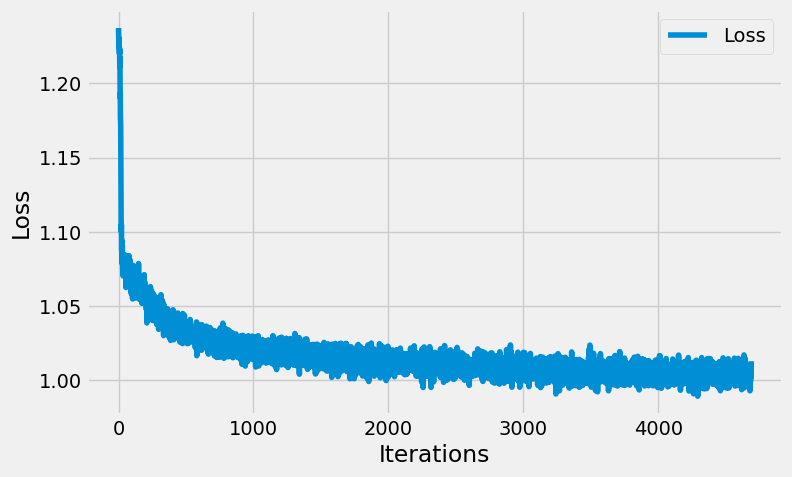

In [7]:
losses = []
outputs = []
epochs = 10
DAE = True

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(epochs):
  for image, _ in train_loader:
    image = image.view(-1, 28 * 28)
    if DAE:
      noise = torch.randn(image.size())
      image = image + noise
    image = image.to(device)
    reconstructed = model(image)
    loss = loss_fn(reconstructed, image)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    outputs.append((epoch, image, reconstructed, loss.item()))

  print(f"epoch:{epoch+1}/{epochs}, Loss:{loss.item()}")

plt.style.use('fivethirtyeight')
plt.figure(figsize=(8, 5))
plt.plot(losses, label='Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [10]:
import matplotlib.pyplot as plt
for image, label in test_loader:

    optimizer.zero_grad()

    noise = torch.randn(image.size())
    image_noise = image + noise
    print(image_noise.size(), noise.size())
    recon_batch = model(image_noise.to(device))
    break


plt.figure(figsize=(20, 12))
for i in range(5):

    # print(f&quot; Image {i} with label {labels[i]}              &quot;, end=&quot;&quot;)
    plt.subplot(3, 5, 1+i)
    plt.imshow(image_noise[i, :, :, :].view(
        28, 28).detach().numpy(), cmap='binary')
    plt.subplot(3, 5, 6+i)
    plt.imshow(recon_batch[i, :].view(28, 28).detach().numpy(), cmap='binary')
    plt.axis('off')
    plt.subplot(3, 5, 11+i)
    plt.imshow(image[i, :, :, :].view(28, 28).detach().numpy(), cmap='binary')
    plt.axis('off')
plt.show()

torch.Size([5, 1, 28, 28]) torch.Size([5, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (140x28 and 784x128)